#### 1. Для данных из таблиц.

In [1]:
import numpy as np
from scipy.stats import norm, chi2
import scipy.stats as ss
from scipy import special
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.distributions.empirical_distribution import ECDF

In [4]:
# Загрузка данных из файла
data = pd.read_csv("data_mathstat.csv", delimiter=" ", header=None)
porosity = np.array(data[0])
gamma_ray = np.array(data[1])
porosity =  sorted(porosity)
k = 10
n = len(data[0])

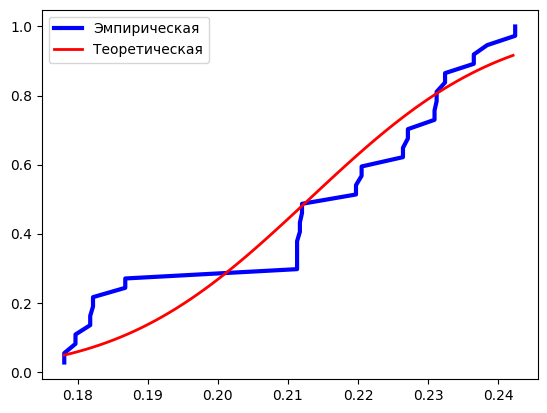

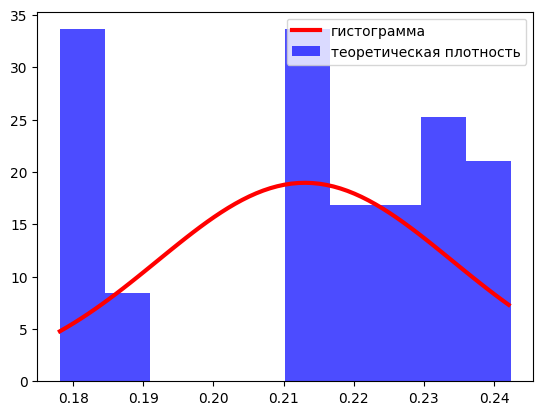

статистика критерия Пирсона равна:  41.55646913528673
квантиль распределения хи-квадрат с 9 степенями свободы, уровня  0.9  равна  14.683656573259837
гипотеза отвергается


In [5]:
# Оценка параметров нормального распределения (среднее и стандартное отклонение)
mu, sigma = np.mean(porosity), np.std(porosity)

# Создание эмпирической функции распределения (ECDF)
ecdf = ECDF(porosity)

# Визуализация эмпирической и теоретической функций распределения
plt.plot(ecdf.x, ecdf.y, color='blue', linewidth=3)
X = np.arange(min(porosity), max(porosity), 0.001)
plt.plot(X, norm.cdf(X, mu, sigma), color='red', linewidth=2)
plt.legend(["Эмпирическая", "Теоретическая"])
plt.show()

plt.hist(porosity, bins=10, density=True, alpha=0.7, color='blue')
plt.plot(X, norm.pdf(X,mu,sigma), color='red', linewidth=3)
plt.legend(["гистограмма","теоретическая плотность"])
plt.show()

i = 0
int_len = (max(porosity) - min(porosity)) / k

nu_array = []
p_array = []
left = min(porosity)
right = min(porosity) + int_len
X2 = 0
for i in range(k):
    nu = 0
    if i == 0:
        nu = nu + 1

    for j in range(n):
        if (left < porosity[j]) and (porosity[j] <= right):
            nu = nu + 1


    p = norm.cdf(right, mu, sigma) - norm.cdf(left, mu, sigma);

    Z2 = (nu - n * p) ** 2 / (n * p * (1 - p));
    X2 = X2 + Z2;
    left = left + int_len;
    right = right + int_len;

print("статистика критерия Пирсона равна: ",X2)
alpha=0.1
quantile=chi2.ppf(1-alpha,k-1)
print("квантиль распределения хи-квадрат с", k-1, "степенями свободы, уровня ",1-alpha," равна ",quantile)
if X2<quantile:
    print ("гипотеза принимается")
else:
    print ("гипотеза отвергается")

In [6]:
Y2 = 0
D = 0
for i in range(n):
    D_new = max(i / n - norm.cdf(porosity[i], mu, sigma), norm.cdf(porosity[i], mu, sigma) - (i - 1) / n)
    if D_new > D:
        D = D_new

stat=D*np.sqrt(n)
print("Статистика критерия Колмогорова: ",stat)
quantile_k=special.kolmogi(alpha)

print("квантиль распределения Колмогорова уровня ",1-alpha," равна ", quantile_k)
if stat<quantile_k:
    print ("гипотеза принимается")
else:
    print ("гипотеза отвергается")

Статистика критерия Колмогорова:  1.3615943973217834
квантиль распределения Колмогорова уровня  0.9  равна  1.2238478702170823
гипотеза отвергается


#### 2. Для сгенерированных данных.

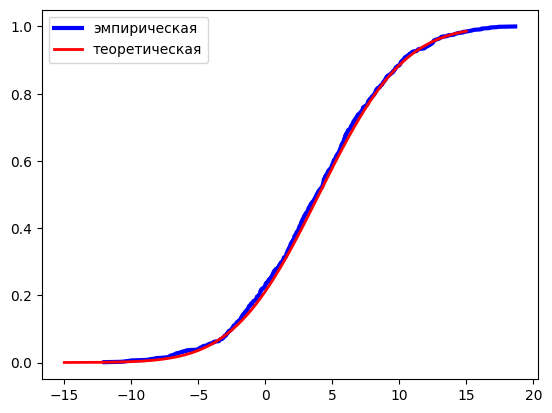

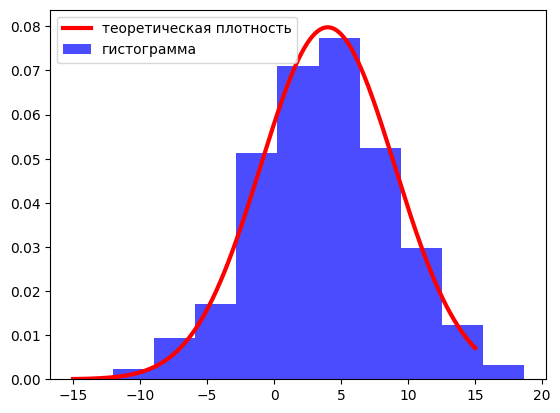

статистика критерия Пирсона равна:  116.35961530330613
квантиль распределения хи-квадрат с 99 степенями свободы, уровня  0.9  равна  117.4068831867789
гипотеза принимается
Статистика критерия Колмогорова:  0.6888306644787162
квантиль распределения Колмогорова уровня  0.9  равна  1.2238478702170823
гипотеза принимается


In [7]:
n=1000
k=100
mu=4
sigma=5
data1=np.random.normal(mu,sigma,n)
data1.sort()
ecdf=ECDF(data1)
plt.plot(ecdf.x,ecdf.y, color='blue', linewidth=3)
X=np.arange(-15,15,0.001)
plt.plot(X,norm.cdf(X,mu,sigma), color='red', linewidth=2)
plt.legend(["эмпирическая","теоретическая"])
plt.show()

plt.hist(data1, bins=10, density=True, alpha=0.7, color='blue')
plt.plot(X, norm.pdf(X,mu,sigma), color='red', linewidth=3)
plt.legend(["теоретическая плотность","гистограмма"])
plt.show()


i = 1
int_len = (max(data1) - min(data1)) / k

nu_array = []
p_array = []
left = min(data1)
right = min(data1) + int_len
X2 = 0
for i in range(k):
    nu = 0
    if i == 0:
        nu = nu + 1

    for j in range(n):
        if (left < data1[j]) and (data1[j] <= right):
            nu = nu + 1


    p = norm.cdf(right, mu, sigma) - norm.cdf(left, mu, sigma);

    Z2 = (nu - n * p) ** 2 / (n * p * (1 - p));
    X2 = X2 + Z2;
    left = left + int_len;
    right = right + int_len;

print("статистика критерия Пирсона равна: ",X2)
alpha=0.1
quantile=chi2.ppf(1-alpha,k-1)
print("квантиль распределения хи-квадрат с", k-1, "степенями свободы, уровня ",1-alpha," равна ",quantile)
if X2<quantile:
    print ("гипотеза принимается")
else:
    print ("гипотеза отвергается")

Y2 = 0
D = 0
for i in range(n):
    D_new = max(i / n - norm.cdf(data1[i], mu, sigma), norm.cdf(data1[i], mu, sigma) - (i - 1) / n)
    if D_new > D:
        D = D_new


stat=D*np.sqrt(n)
print("Статистика критерия Колмогорова: ",stat)
quantile_k=special.kolmogi(alpha)

print("квантиль распределения Колмогорова уровня ",1-alpha," равна ", quantile_k)
if stat<quantile_k:
    print ("гипотеза принимается")
else:
    print ("гипотеза отвергается")

#### 3. Генерация n выборок.


In [8]:
def kolmogorov_dist(x):
    y=0
    if x>0:
        y=1
        p=1
        k=1
        while abs(p)>0.0001:
            p=2*(-1)**k*np.exp(-2 * k**2 * x**2);
            y=y+p;
            k=k+1;
    return y


def kolmogorov_p(x):
    y = 0
    if x > 0:
        p = 1
        k = 1
        while abs(p) > 0.0001:
            p = 2 * (-1) ** k * np.exp(-2 * k ** 2 * x ** 2);
            y = y - 8 * x * p
            k = k + 1
    return y

D_array = []
n1=1000

for i in range(n1):
    DD=0
    data_new = np.random.normal(mu, sigma, n)
    data_new.sort()
    left = min(data_new)
    right = min(data_new) + int_len
    int_len = (max(data_new) - min(data_new)) / k
    for j in range(n):
        D_new = max(j / n - norm.cdf(data_new[j], mu, sigma), norm.cdf(data_new[j], mu, sigma) - (j - 1) / n)
        if D_new > DD:
            DD = D_new

    D_array.append(DD * np.sqrt(n))

D_array.sort()

D_of_D = 0;

for j in range(n1):
    D_new = max(j / n1 - kolmogorov_dist(D_array[j]), kolmogorov_dist(D_array[j]) - (j - 1) / n1);
    if D_new > D_of_D:
        D_of_D = D_new


stat_k_dist=D_of_D*np.sqrt(n1)
print("Выборка распределения Колмогорова\nСтатистика критерия Колмогорова: ",stat_k_dist)
quantile_k=special.kolmogi(alpha)
print("квантиль распределения Колмогорова уровня ",1-alpha," равна ", quantile_k)
if stat_k_dist<quantile_k:
    print ("гипотеза принимается")
else:
    print ("гипотеза отвергается")
ecdf_kolmogorov=ECDF(D_array)
X1=np.arange(0,3,0.001)
plt.plot(ecdf_kolmogorov.x,ecdf_kolmogorov.y, color='blue', linewidth=3)
Y1=np.zeros(len(X1))

for i in range(len(X1)):
    Y1[i]=kolmogorov_dist(X1[i])

plt.plot(X1,Y1,color='red', linewidth=2)
plt.legend(["эмпирическая","теоретическая"])
plt.show()


X2=np.arange(0,2,0.05)

y2=np.zeros(len(X2))
print(y2.shape)
for i in range(len(X2)):
    y2[i]=kolmogorov_p(X2[i])

counts, bins = np.histogram(D_array, bins=10)
counts=counts/max(counts)*max(y2)
bins=np.insert(bins,0,0)
plt.hist(bins[:-2], bins, weights=counts)
plt.plot(X2, y2, color='red', linewidth=3)
plt.show()

KeyboardInterrupt: 

#### 4. Проверка

Text(0.5, 1.0, 'Гистограмма сгенерированной выборки. mu = 2, sigma^2 = 3')

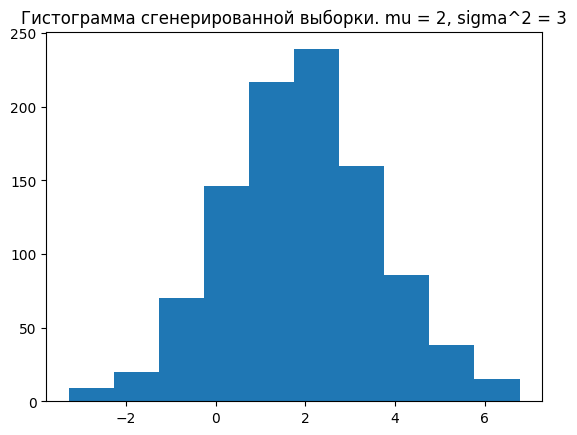

In [2]:
#Делаю второй пункт. Проверяю, что гаусс действительно гаусс
np.random.seed(0)
n_gauss = 1000
mu_gauss = 2
var_gauss = 3
gauss_samples = np.random.normal(mu_gauss, np.sqrt(var_gauss), n_gauss)
data = plt.hist(gauss_samples)
plt.title(f'Гистограмма сгенерированной выборки. mu = {mu_gauss}, sigma^2 = {var_gauss}')

In [3]:
len_int = (max(gauss_samples) - min(gauss_samples)) / 10
interval_gauss = [(min(gauss_samples), min(gauss_samples) + 3 * len_int)]
len_int2 = (max(gauss_samples) - 2*len_int - (min(gauss_samples) + 3 * len_int))/8
for i in range(1, 9):
    interval_gauss.append((interval_gauss[i-1][1], interval_gauss[i-1][1] +  len_int2))
interval_gauss.append((max(gauss_samples) - 2*len_int, max(gauss_samples)))

In [4]:
n_samples_gauss_my = []
for i in range(len(interval_gauss)):
    k = 0
    for j in gauss_samples:
        if j >= interval_gauss[i][0] and j <= interval_gauss[i][1]:
            k+=1
    n_samples_gauss_my.append(k)

In [5]:
n_samples_gauss_my

[99, 76, 120, 142, 141, 150, 97, 75, 47, 53]

In [6]:
#Вычисляю оценки параметров для гаусса и вероятности попадания в интервалы
gauss_mean = np.mean(gauss_samples)
gauss_var_est = np.var(gauss_samples, ddof = 1)
#Задаю функцию распределения с оценёнными параметрами
P_gauss_function = ss.norm(loc = gauss_mean, scale = np.sqrt(gauss_var_est))
#Считаю вероятность попадания в каждый интервал
P_gauss = [P_gauss_function.cdf(interval_gauss[i][1]) - P_gauss_function.cdf(interval_gauss[i][0]) for i in range(len(interval_gauss))]

In [7]:
P_gauss

[0.09994189376539231,
 0.08088481914086232,
 0.11248463372396711,
 0.13688091270588298,
 0.145753112673694,
 0.13580588613678002,
 0.11072470481135621,
 0.07899395230820949,
 0.04931324243476276,
 0.04577376061287963]

In [8]:
#Считаю статистику
Chi2_gauss = sum([((n_samples_gauss_my[i] - n_gauss*P_gauss[i])**2)/(n_gauss*P_gauss[i]*(1-P_gauss[i])) for i in range(len(P_gauss))])
Chi2_gauss, ss.chi2(7).ppf(0.9)

(6.458472457303791, 12.017036623780532)

In [9]:
gauss_samples = sorted(gauss_samples)
D_gauss = [max(((i+1)/n_gauss - P_gauss_function.cdf(gauss_samples[i])), (P_gauss_function.cdf(gauss_samples[i]) - i/n_gauss)) for i in range(n_gauss)]
max(D_gauss), max(D_gauss)*np.sqrt(n_gauss), ss.kstwobign().ppf(0.9)

(0.019125294462402076, 0.604794914225961, 1.2238478702170825)

In [10]:
pirson = 0
kolm = 0
pirson_array = []
kolm_array = []
# np.random.seed(0)
for i in range(100):
    gauss_samplesi = np.random.normal(mu_gauss, np.sqrt(var_gauss), n_gauss)
    len_int = (max(gauss_samplesi) - min(gauss_samplesi)) / 10
    interval_gaussi = [(min(gauss_samplesi), min(gauss_samplesi) + 3 * len_int)]
    len_int2 = (max(gauss_samplesi) - 2*len_int - (min(gauss_samplesi) + 3 * len_int))/8
    for j in range(1, 9):
        interval_gaussi.append((interval_gaussi[j-1][1], interval_gaussi[j-1][1] + len_int2))
    interval_gaussi.append((max(gauss_samplesi) - 2*len_int, max(gauss_samplesi)))
    n_samples_gauss_i = []
    for m in range(len(interval_gaussi)):
        k = 0
        for t in gauss_samplesi:
            if t >= interval_gaussi[m][0] and t <= interval_gaussi[m][1]:
                k+=1
        n_samples_gauss_i.append(k)
    gauss_meani = np.mean(gauss_samplesi)
    gauss_var_esti = np.var(gauss_samplesi, ddof = 1)
    #Задаю функцию распределения с оценёнными параметрами
    P_gauss_functioni = ss.norm(loc = mu_gauss, scale = np.sqrt(var_gauss))
    #Считаю вероятность попадания в каждый интервал
    P_gaussi = [P_gauss_functioni.cdf(interval_gaussi[j][1]) - P_gauss_functioni.cdf(interval_gaussi[j][0]) for j in range(len(interval_gaussi))]
    Chi2_gaussi = sum([((n_samples_gauss_i[j] - n_gauss*P_gaussi[j])**2)/(n_gauss*P_gaussi[j]*(1-P_gaussi[j])) for j in range(len(P_gaussi))])
    pirson_array.append(Chi2_gaussi)
    pirson += Chi2_gaussi<ss.chi2(7).ppf(0.9)
    gauss_samplesi = sorted(gauss_samplesi)
    D_gaussi = [max(((i+1)/n_gauss - P_gauss_functioni.cdf(gauss_samplesi[i])), (P_gauss_functioni.cdf(gauss_samplesi[i]) - i/n_gauss)) for i in range(n_gauss)]
    kolm+= max(D_gaussi)*np.sqrt(n_gauss) < ss.kstwobign().ppf(0.9)
    kolm_array.append(max(D_gaussi)*np.sqrt(n_gauss))
print(pirson, kolm)

79 92


Text(0.5, 1.0, 'Гистограмма 100 статистик Колмогорова и предельное распределение Колмогорова')

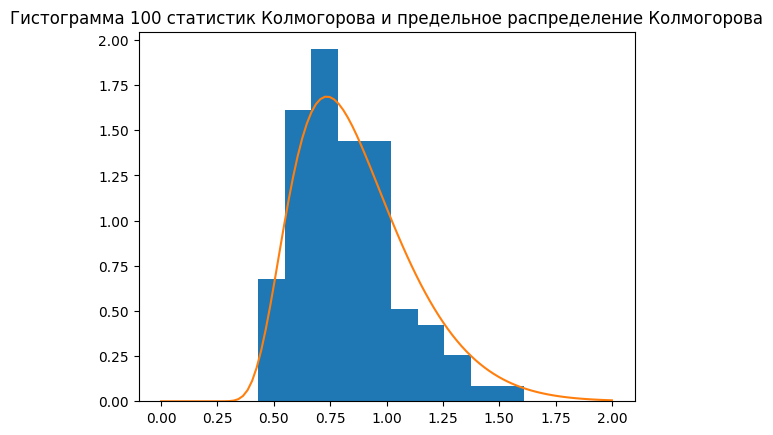

In [11]:
hist_kolm = plt.hist(kolm_array, density = True)
x = np.linspace(0, 2, 100)
plt.plot(x, ss.kstwobign().pdf(x))
plt.title('Гистограмма 100 статистик Колмогорова и предельное распределение Колмогорова')

In [12]:
Chi2_7n = ss.chi2(7)
D_for_pirson = [max(((i+1)/100 - Chi2_7n.cdf(pirson_array[i])), (Chi2_7n.cdf(pirson_array[i]) - i/100)) for i in range(100)]
max(D_for_pirson), ss.kstwobign().ppf(0.9)

(0.9251026356079632, 1.2238478702170825)

In [13]:
P_kolm

NameError: name 'P_kolm' is not defined

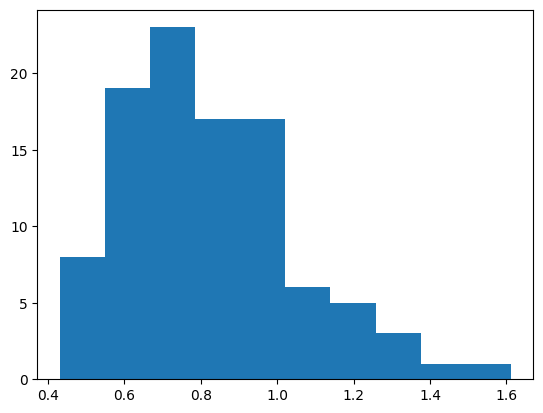

In [14]:
hist_kolm = plt.hist(kolm_array)

In [15]:
n_kolm, bins_kolm = hist_kolm[0], hist_kolm[1]
kolm_func = ss.kstwobign()
P_kolm = [kolm_func.cdf(bins_kolm[i+1]) - kolm_func.cdf(bins_kolm[i]) for i in range(len(bins_kolm) - 1)]
chi2_kolm = sum([((n_kolm[i] - 100*P_kolm[i])**2)/(100*P_kolm[i]) for i in range(10)])
chi2_kolm, ss.chi2(9).ppf(0.9)

(4.846845841011344, 14.683656573259837)